In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [3]:
data = pd.read_csv('/kaggle/input/nyc-taxi-trip-duration/train.zip')
test = pd.read_csv('/kaggle/input/nyc-taxi-trip-duration/test.zip')

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
print(test.shape)
print('\n ------------ \n')
print(test.columns)

(625134, 9)

 ------------ 

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')


In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
data['passenger_count'].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

In [8]:
data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

In [9]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Checking for missing values

In [10]:
missing_values = data.isnull().sum()

# Print columns with missing values and their respective counts
for column, count in missing_values.items():
    if count > 0:
        print(f"Column '{column}' has {count} missing values.")
    else: 
        print(f"No missing values in training column'{column}'.")

No missing values in training column'id'.
No missing values in training column'vendor_id'.
No missing values in training column'pickup_datetime'.
No missing values in training column'dropoff_datetime'.
No missing values in training column'passenger_count'.
No missing values in training column'pickup_longitude'.
No missing values in training column'pickup_latitude'.
No missing values in training column'dropoff_longitude'.
No missing values in training column'dropoff_latitude'.
No missing values in training column'store_and_fwd_flag'.
No missing values in training column'trip_duration'.


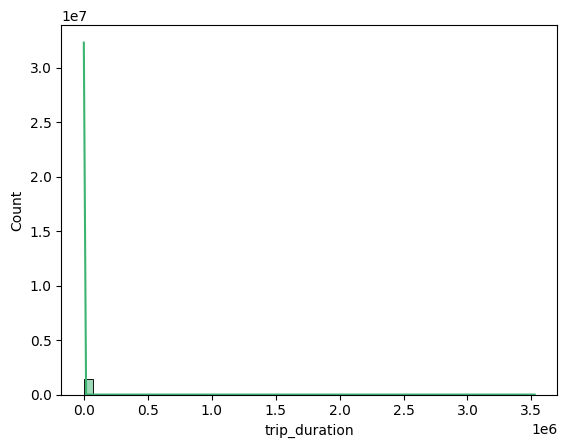

In [11]:
sns.histplot(data['trip_duration'], bins=50, kde=True, color='mediumseagreen')
plt.show()

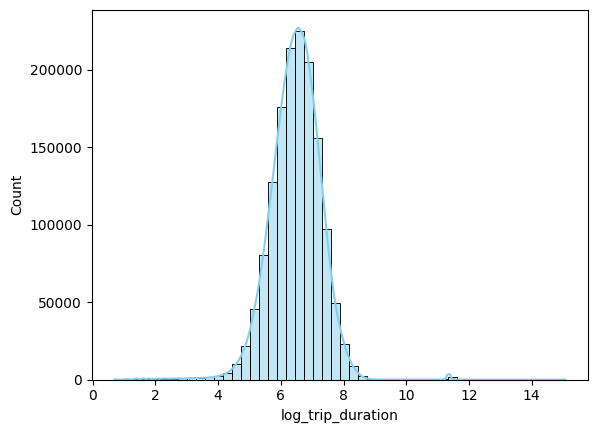

In [12]:
data['log_trip_duration'] = data['trip_duration'].apply(lambda x: 0 if x <= 0 else np.log1p(x))

sns.histplot(data['log_trip_duration'], bins=50, kde=True, color='skyblue')
plt.show()

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

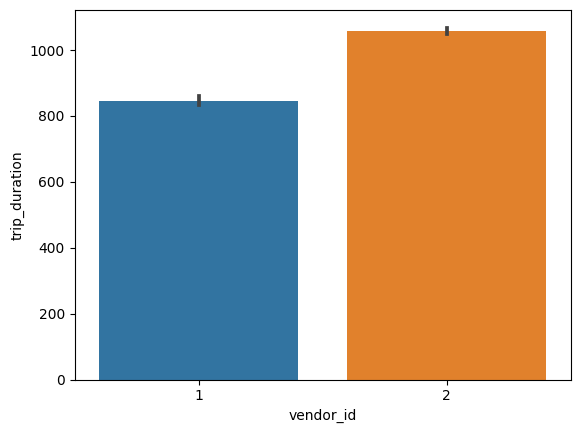

In [13]:
sns.barplot(x=data['vendor_id'], y=data['trip_duration'])

<Axes: xlabel='trip_duration', ylabel='store_and_fwd_flag'>

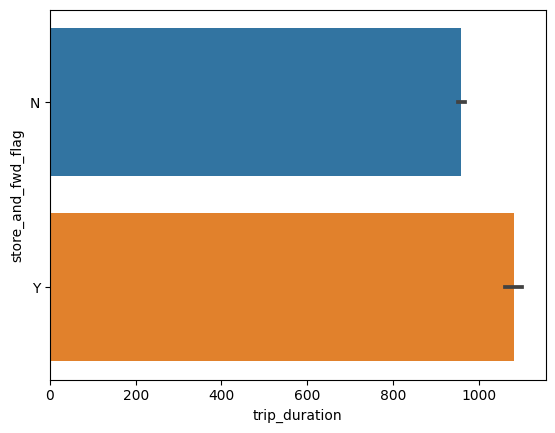

In [14]:
sns.barplot(x=data['trip_duration'], y=data['store_and_fwd_flag'])

Extracting data from 'pickup_datetime'

In [15]:
data['new_datetime'] = pd.to_datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

print(data['pickup_datetime'].head())
print('\n ------------ \n')
print(data['new_datetime'].head())

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
Name: pickup_datetime, dtype: object

 ------------ 

0   2016-03-14 17:24:55
1   2016-06-12 00:43:35
2   2016-01-19 11:35:24
3   2016-04-06 19:32:31
4   2016-03-26 13:30:55
Name: new_datetime, dtype: datetime64[ns]


In [16]:
# Creating new columns from datetime

data['day'] = data['new_datetime'].dt.day
data['hour'] = data['new_datetime'].dt.hour
data['month'] = data['new_datetime'].dt.month
data['weekday'] = data['new_datetime'].dt.weekday

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,new_datetime,day,hour,month,weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14 17:24:55,14,17,3,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12 00:43:35,12,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19 11:35:24,19,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06 19:32:31,6,19,4,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26 13:30:55,26,13,3,5


<Axes: xlabel='hour', ylabel='trip_duration'>

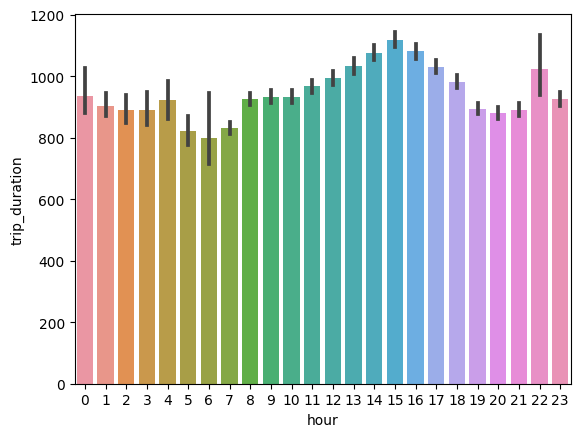

In [17]:
sns.barplot(x=data['hour'], y=data['trip_duration'])

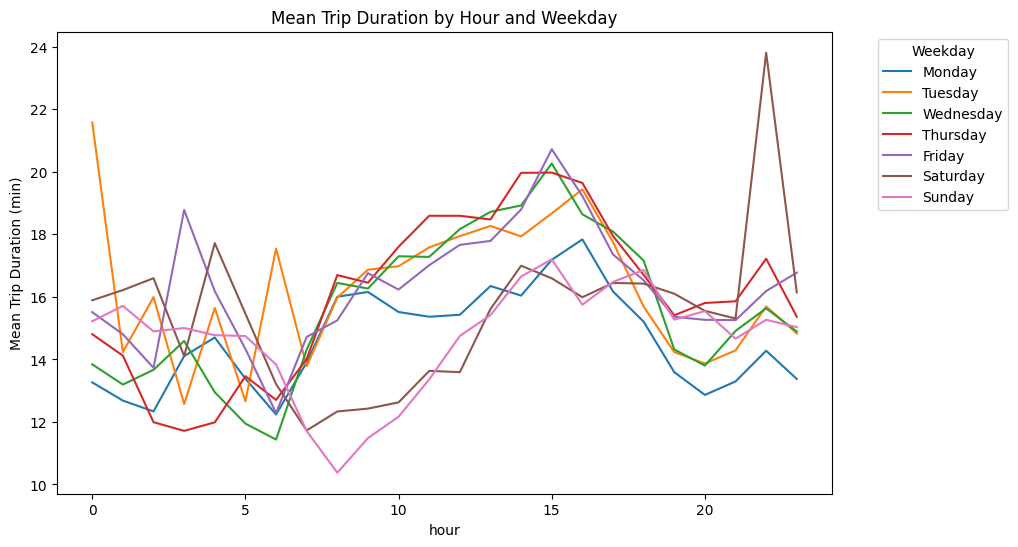

In [18]:
grouped_data = data.groupby(['hour', 'weekday'])['trip_duration'].mean().reset_index()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
grouped_data['weekday'] = grouped_data['weekday'].map(weekday_names)

grouped_data['trip_duration'] /= 60

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='trip_duration', hue='weekday', data=grouped_data, linewidth=1.5)
plt.title('Mean Trip Duration by Hour and Weekday')
plt.ylabel("Mean Trip Duration (min)")
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

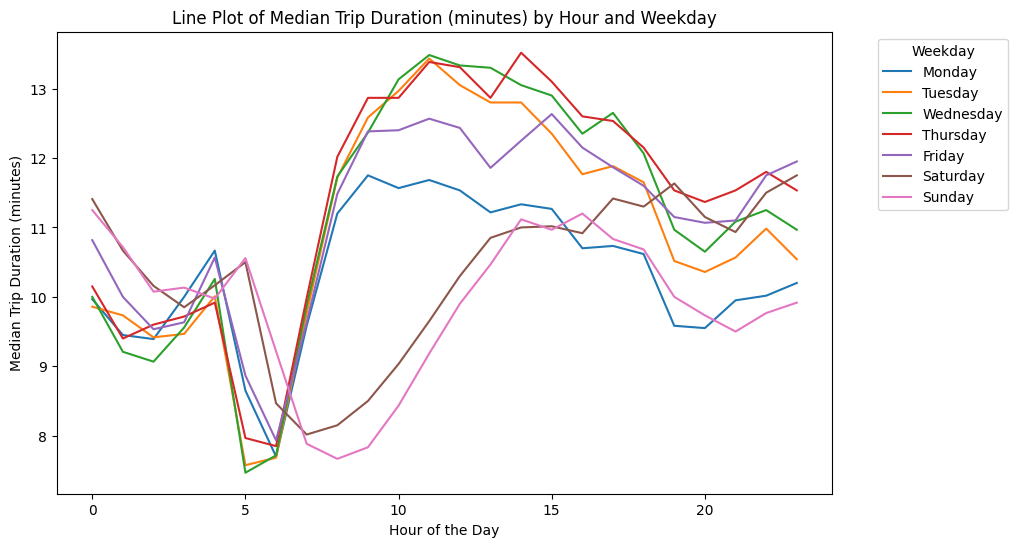

In [19]:
grouped_data_median = data.groupby(['hour', 'weekday'])['trip_duration'].median().reset_index()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
grouped_data_median['weekday'] = grouped_data_median['weekday'].map(weekday_names)

grouped_data_median['trip_duration'] /= 60

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='trip_duration', hue='weekday', data=grouped_data_median, linewidth=1.5)
plt.title('Line Plot of Median Trip Duration (minutes) by Hour and Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Median Trip Duration (minutes)')
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Finding the minimal distance between pickup and dropoff coordinates

In [20]:
# Find the distance between pickup and dropoff locations (in km) using haversine
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # Radius of the Earth in kilometers
    return distance

data['distance'] = data.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

data['distance'].describe()

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.231837e+00
50%      2.093717e+00
75%      3.875337e+00
max      1.240909e+03
Name: distance, dtype: float64

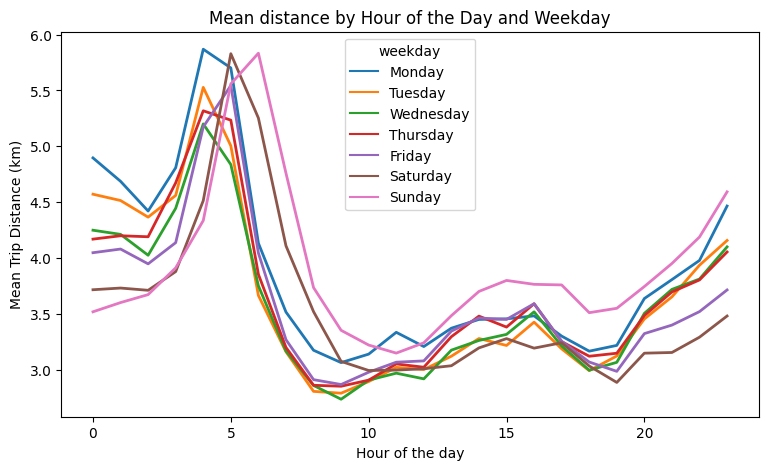

In [21]:
grouped_mean_distance = data.groupby(['hour', 'weekday'])['distance'].mean().reset_index()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
grouped_mean_distance['weekday'] = grouped_mean_distance['weekday'].map(weekday_names)

plt.figure(figsize= (9, 5))
sns.lineplot(x='hour', y='distance', hue='weekday', data=grouped_mean_distance, linewidth=2)
plt.title('Mean distance by Hour of the Day and Weekday')
plt.xlabel('Hour of the day')
plt.ylabel("Mean Trip Distance (km)")
plt.show()

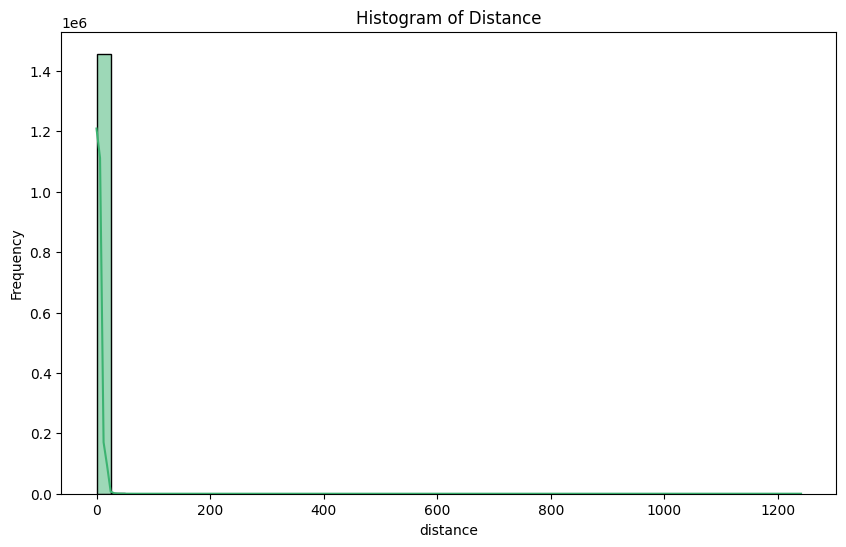

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['distance'], bins=50, kde=True, color='mediumseagreen')
plt.title('Histogram of Distance')
plt.ylabel('Frequency')
plt.show()

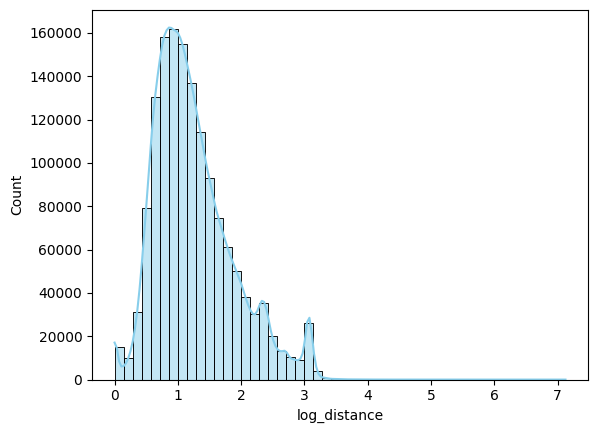

In [23]:
data['log_distance'] = data['distance'].apply(lambda x: 0 if x <= 0 else np.log1p(x))

sns.histplot(data['log_distance'], bins=50, kde=True, color='skyblue')
plt.show()

Preprocessing the data using a pipeline

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from haversine import haversine
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder

In [25]:
# Function to extract datetime features
def extract_datetime_features(X):
    X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
    X['hour'] = X['pickup_datetime'].dt.hour
    X['weekday'] = X['pickup_datetime'].dt.dayofweek
    return X

# Function to calculate haversine distance
def haversine_distance(X):
    X['distance'] = X.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']),
                                                  (row['dropoff_latitude'], row['dropoff_longitude'])), axis=1)
    return X

# Function to add log transformed columns
def add_log_columns(X):
    X['log_distance'] = X['distance'].apply(lambda x: 0 if x <= 0 else np.log1p(x))
 #   X['log_trip_duration'] = X['trip_duration'].apply(lambda x: 0 if x <= 0 else np.log1p(x))
    return X

In [26]:
missing_values_test = test.isnull().sum()

# Print columns with missing values and their respective counts
for column, count in missing_values_test.items():
    if count > 0:
        print(f"Column '{column}' has {count} missing values.")
    else: 
        print(f"No missing values in test column'{column}'.")

No missing values in test column'id'.
No missing values in test column'vendor_id'.
No missing values in test column'pickup_datetime'.
No missing values in test column'passenger_count'.
No missing values in test column'pickup_longitude'.
No missing values in test column'pickup_latitude'.
No missing values in test column'dropoff_longitude'.
No missing values in test column'dropoff_latitude'.
No missing values in test column'store_and_fwd_flag'.


In [27]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,new_datetime,day,hour,month,weekday,distance,log_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14 17:24:55,14,17,3,0,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12 00:43:35,12,0,6,6,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19 11:35:24,19,11,1,1,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06 19:32:31,6,19,4,2,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26 13:30:55,26,13,3,5,1.188588,0.783257


Método alternativo ao pipeline

In [28]:
data = extract_datetime_features(data)
data = haversine_distance(data)
data = add_log_columns(data)

# X_manual is our manual preprocessing of columns
X_manual = data
X_manual.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,new_datetime,day,hour,month,weekday,distance,log_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14 17:24:55,14,17,3,0,1.498523,0.915700
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12 00:43:35,12,0,6,6,1.805510,1.031585
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19 11:35:24,19,11,1,1,6.385107,1.999465
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06 19:32:31,6,19,4,2,1.485500,0.910474
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26 13:30:55,26,13,3,5,1.188590,0.783258


In [29]:
from sklearn.preprocessing import OrdinalEncoder

columns_to_encode = ['store_and_fwd_flag']
encoder = OrdinalEncoder()
X_manual[columns_to_encode] = encoder.fit_transform(data[columns_to_encode])


#------------------------------------

columns_to_keep = ['vendor_id', 'log_distance', 'hour', 'weekday', 'store_and_fwd_flag']

X_manual = X_manual[columns_to_keep]
print(X_manual.head())

y = data['trip_duration']


   vendor_id  log_distance  hour  weekday  store_and_fwd_flag
0          2      0.915700    17        0                 0.0
1          1      1.031585     0        6                 0.0
2          2      1.999465    11        1                 0.0
3          2      0.910474    19        2                 0.0
4          2      0.783258    13        5                 0.0


In [30]:
# Split the preprocessed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_manual, y, test_size=0.20, random_state=0)
print("train test split complete")

train test split complete


In [31]:
rf_pipeline = Pipeline([
    ('regressor', RandomForestRegressor(n_estimators=50))
])


rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred))

print("Root Mean Squared Logarithmic Error (RMSLE) on Test Set:",rmsle_test)

Root Mean Squared Logarithmic Error (RMSLE) on Test Set: 0.6062784411236241


In [32]:
X_valid = test
X_valid.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [33]:
# Apply the preprocessing steps to the test dataset
test = extract_datetime_features(test)
test = haversine_distance(test)
test = add_log_columns(test)

X_valid = test 

X_valid[columns_to_encode] = encoder.fit_transform(test[columns_to_encode])

columns_to_keep = ['vendor_id', 'log_distance', 'hour', 'weekday', 'store_and_fwd_flag']

X_valid = X_valid[columns_to_keep]
print(X_valid.head())

# Getting 'id' from test set
y_valid = test['id']

   vendor_id  log_distance  hour  weekday  store_and_fwd_flag
0          1      1.320803    23        3                 0.0
1          1      1.324218    23        3                 0.0
2          1      0.835583    23        3                 0.0
3          2      1.835632    23        3                 0.0
4          1      0.673375    23        3                 0.0


Muito perigoso continuar!!!

In [34]:
# Make predictions on the test dataset
test_predictions = rf_pipeline.predict(X_valid)

# Create a new column in the test DataFrame for 'trip_duration' with predicted values
test['trip_duration'] = test_predictions

# Create a DataFrame with 'id' and predicted 'trip_duration'
submission_df = pd.DataFrame({'id': test['id'], 'trip_duration': test_predictions})

# Save the predictions to a CSV file
submission_df.to_csv('submission1.csv', index=False)

print('Prediction complete')

print(submission_df.head())

Prediction complete
          id  trip_duration
0  id3004672         522.34
1  id3505355         701.96
2  id1217141         348.66
3  id2150126        1065.20
4  id1598245         297.88
